In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Import Modules**

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

**Load the Dataset**

In [3]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
paths[:5]
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

**Create Dataframes**

In [5]:
df=pd.DataFrame()
df['speech']= paths
df['label']= labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [6]:
df['label'].value_counts()

fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: label, dtype: int64

**Exploratory Data Analysis**

<AxesSubplot:xlabel='label', ylabel='count'>

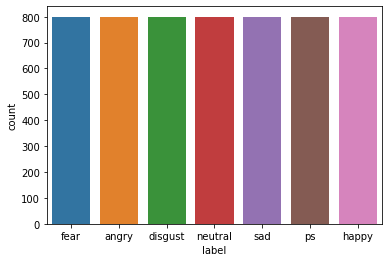

In [7]:
sns.countplot(df['label'])

In [8]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(14,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x = librosa.stft(data) 
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

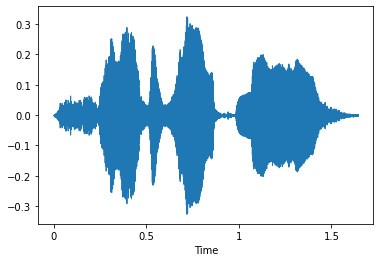

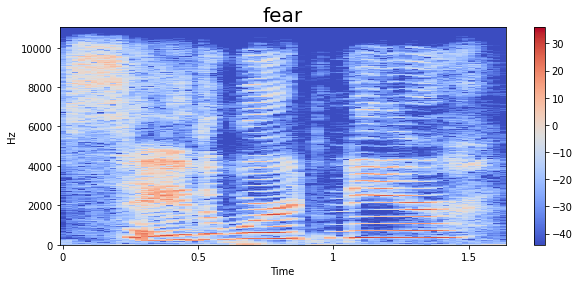

In [9]:
emotion = 'fear'
path = df['speech'][df['label']==emotion][2]
data,sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

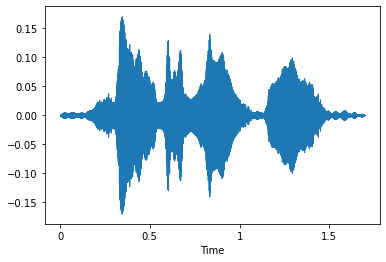

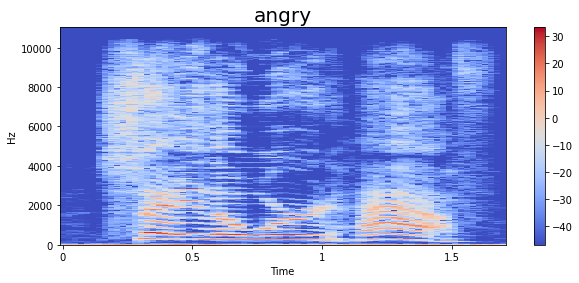

In [10]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

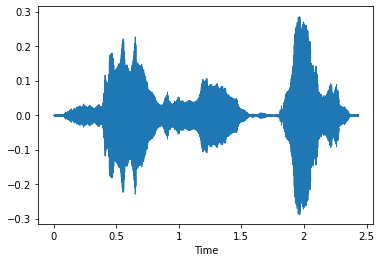

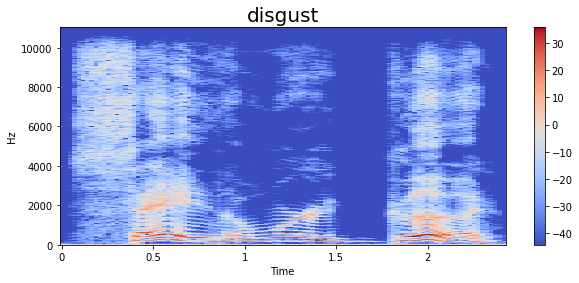

In [11]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

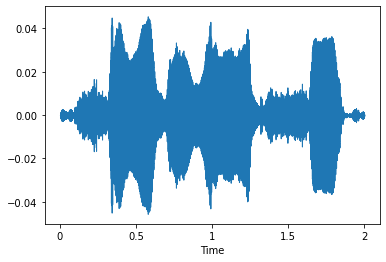

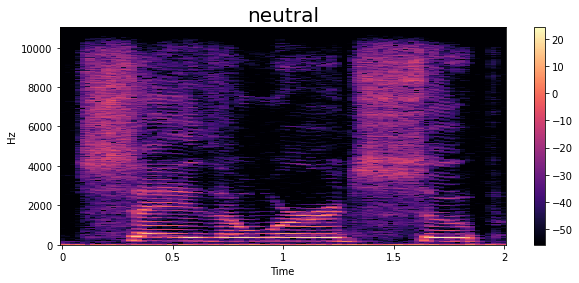

In [12]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

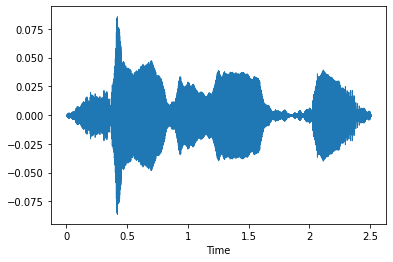

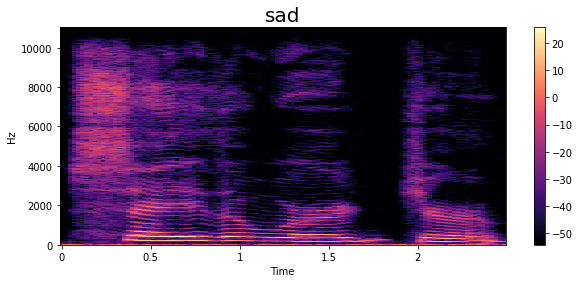

In [13]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

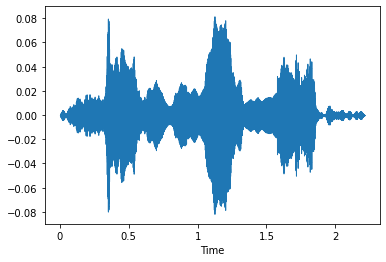

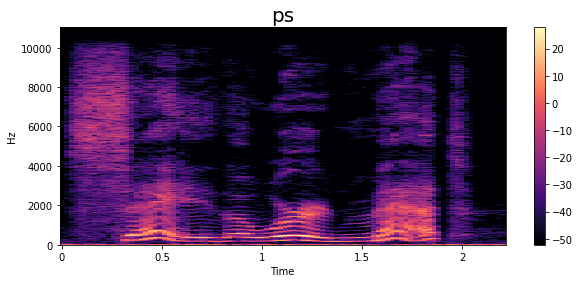

In [14]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)


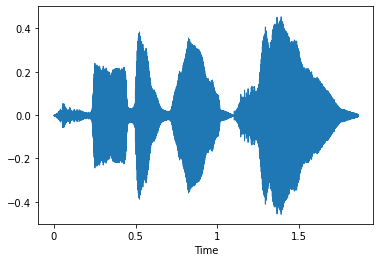

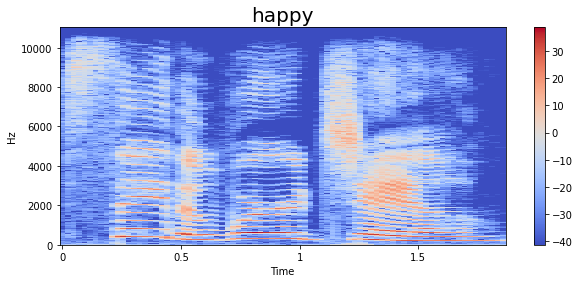

In [15]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [16]:
def extract_mfcc(filename):
    y,sr = librosa.load(filename, duration =3,offset=0.5)
    mfcc= np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T, axis=0)
    return mfcc

In [17]:
extract_mfcc(df['speech'][0])

array([-287.13037  ,   87.756935 ,   -4.139178 ,   24.081968 ,
        -16.696726 ,   12.9706335,   10.522443 ,   -1.1463207,
         -0.7333776,   12.855535 ,  -19.147291 ,   -6.418062 ,
          4.9657674,   -2.6571147,  -10.655446 ,    4.9578824,
        -14.555861 ,   15.37587  ,   18.444933 ,   23.878317 ,
         31.495148 ,   17.326372 ,   -4.764838 ,    1.7432449,
        -12.009848 ,    7.34574  ,   -3.205127 ,   -7.1714525,
        -11.410635 ,   -2.0019934,   -5.6109643,    4.532194 ,
        -11.396626 ,   -8.892363 ,   -3.7391381,    4.8819685,
         -1.5599906,    2.4654472,   11.599151 ,   11.042193 ],
      dtype=float32)

In [18]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [19]:
X_mfcc

0       [-287.13037, 87.756935, -4.139178, 24.081968, ...
1       [-350.0836, 37.654167, -6.292855, 17.096148, 4...
2       [-341.78152, 56.15365, -16.617884, 23.219698, ...
3       [-309.17456, 24.854897, -8.001089, 10.065497, ...
4       [-347.12918, 49.69155, -27.524876, 22.730288, ...
                              ...                        
5595    [-376.5839, 63.959797, -3.0598662, 11.498796, ...
5596    [-316.5801, 43.546066, -9.336959, -0.19844404,...
5597    [-359.7638, 81.01536, -18.355762, 5.30123, -25...
5598    [-354.38315, 103.432144, -15.916283, -10.30884...
5599    [-391.15958, 56.44471, -1.0464002, 0.95874214,...
Name: speech, Length: 5600, dtype: object

In [20]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [21]:
## input split
X=np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [23]:
y =y.toarray()

In [24]:
y.shape

(5600, 7)

**Create the LSTM Model**

In [25]:
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense,LSTM,Dropout

model= Sequential([
    LSTM(123,return_sequences= False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32,activation = 'relu'),
    Dropout(0.2),
    Dense(7,activation = 'softmax')
])
#sgd = SGD(lr=0, decay=1e-6, momentum=0.9,nesterov = True)
#model.compile(loss='sparse_categorical_crossentrophy',optimizer = sgd,metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 123)               61500     
_________________________________________________________________
dense (Dense)                (None, 64)                7936      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 231       
Total params: 71,747
Trainable params: 71,747
Non-trainable params: 0
____________________________________________________

In [26]:
## Train the model

history = model.fit(X, y, validation_split = 0.2, epochs = 50, batch_size = 64, shuffle = True,verbose=True)

Epoch 1/50
70/70 [==============================] - 6s 57ms/step - loss: 1.1126 - accuracy: 0.6007 - val_loss: 1.2124 - val_accuracy: 0.4259
Epoch 2/50
70/70 [==============================] - 3s 49ms/step - loss: 0.4336 - accuracy: 0.8475 - val_loss: 0.3723 - val_accuracy: 0.9071
Epoch 3/50
70/70 [==============================] - 4s 60ms/step - loss: 0.2087 - accuracy: 0.9375 - val_loss: 0.2012 - val_accuracy: 0.9464
Epoch 4/50
70/70 [==============================] - 3s 49ms/step - loss: 0.1206 - accuracy: 0.9643 - val_loss: 0.1774 - val_accuracy: 0.9393
Epoch 5/50
70/70 [==============================] - 3s 48ms/step - loss: 0.1048 - accuracy: 0.9703 - val_loss: 0.0578 - val_accuracy: 0.9795
Epoch 6/50
70/70 [==============================] - 3s 49ms/step - loss: 0.0988 - accuracy: 0.9730 - val_loss: 0.2087 - val_accuracy: 0.9259
Epoch 7/50
70/70 [==============================] - 3s 48ms/step - loss: 0.0775 - accuracy: 0.9768 - val_loss: 0.0332 - val_accuracy: 0.9893
Epoch 8/50
70

**Plot the results********

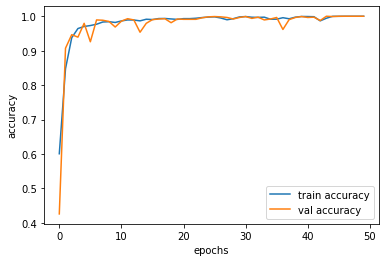

In [27]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label= 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

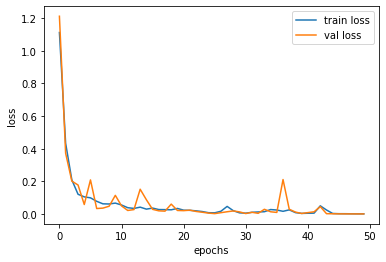

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()